In [1]:
# Importing the yfinance library to fetch financial data from Yahoo Finance
# Importing matplotlib for plotting and visualizing the data
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
# Creating a Ticker object for the S&P 500 index and Apple Inc. using their respecive ticker symbols
sp500 = yf.Ticker("^GSPC")  
apple = yf.Ticker("AAPL") 

In [3]:
# Fetching the historical data for the S&P 500 index and Apple Inc. for the maximum available period
sp500 = sp500.history(period="max")
apple = apple.history(period="max")

In [4]:
# Displaying the data of S&P 500
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-05-14 00:00:00-04:00,5221.100098,5250.370117,5217.979980,5246.680176,4763580000,0.0,0.0
2024-05-15 00:00:00-04:00,5263.259766,5311.759766,5263.259766,5308.149902,4360810000,0.0,0.0
2024-05-16 00:00:00-04:00,5310.069824,5325.490234,5296.189941,5297.100098,3817470000,0.0,0.0


In [5]:
apple

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099058,0.099488,0.099058,0.099058,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094320,0.094320,0.093890,0.093890,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087429,0.087429,0.086999,0.086999,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089152,0.089582,0.089152,0.089152,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091736,0.092167,0.091736,0.091736,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2024-05-14 00:00:00-04:00,187.509995,188.300003,186.289993,187.429993,52393600,0.0,0.0
2024-05-15 00:00:00-04:00,187.910004,190.649994,187.369995,189.720001,70400000,0.0,0.0
2024-05-16 00:00:00-04:00,190.470001,191.100006,189.660004,189.839996,52845200,0.0,0.0


In [6]:
# Accessing the index of the S&P 500 historical data, which contains the dates for the data points
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-05-07 00:00:00-04:00', '2024-05-08 00:00:00-04:00',
               '2024-05-09 00:00:00-04:00', '2024-05-10 00:00:00-04:00',
               '2024-05-13 00:00:00-04:00', '2024-05-14 00:00:00-04:00',
               '2024-05-15 00:00:00-04:00', '2024-05-16 00:00:00-04:00',
               '2024-05-17 00:00:00-04:00', '2024-05-20 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24212, freq=None)

In [7]:
# Accessing the index of the Apple Inc. historical data, which contains the dates for the data points
apple.index

DatetimeIndex(['1980-12-12 00:00:00-05:00', '1980-12-15 00:00:00-05:00',
               '1980-12-16 00:00:00-05:00', '1980-12-17 00:00:00-05:00',
               '1980-12-18 00:00:00-05:00', '1980-12-19 00:00:00-05:00',
               '1980-12-22 00:00:00-05:00', '1980-12-23 00:00:00-05:00',
               '1980-12-24 00:00:00-05:00', '1980-12-26 00:00:00-05:00',
               ...
               '2024-05-07 00:00:00-04:00', '2024-05-08 00:00:00-04:00',
               '2024-05-09 00:00:00-04:00', '2024-05-10 00:00:00-04:00',
               '2024-05-13 00:00:00-04:00', '2024-05-14 00:00:00-04:00',
               '2024-05-15 00:00:00-04:00', '2024-05-16 00:00:00-04:00',
               '2024-05-17 00:00:00-04:00', '2024-05-20 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=10950, freq=None)

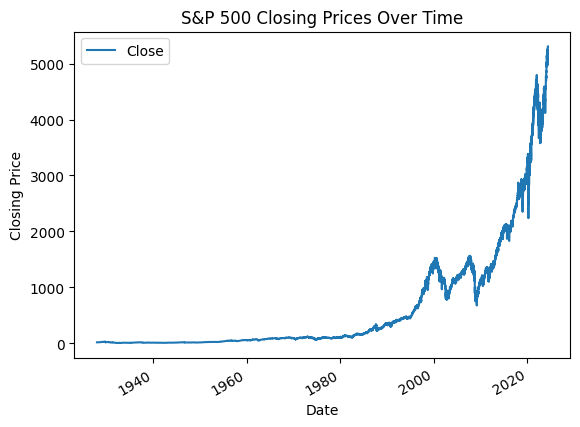

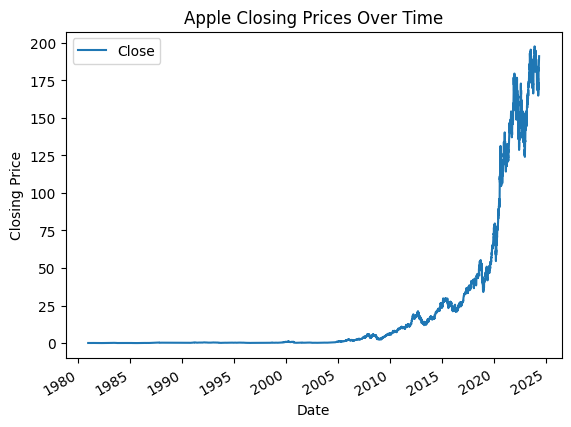

In [8]:
# Plot S&P 500 data
sp500.plot.line(y="Close", use_index=True)
plt.title('S&P 500 Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

# Plot Apple data
apple.plot.line(y="Close", use_index=True)
plt.title('Apple Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

In [9]:
# Removing the 'Dividends' & 'Stock Splits' column from the S&P 500 historical data as it is not needed
del sp500["Dividends"]
del sp500["Stock Splits"]

# Removing the 'Dividends' & 'Stock Splits' column from the Apple historical data as it is not needed
del apple["Dividends"]
del apple["Stock Splits"]

In [10]:
# Creating a new column 'Tomorrow' in the S&P 500 historical data by shifting the 'Close' prices one day back
sp500["Tomorrow"] = sp500["Close"].shift(-1)
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-05-14 00:00:00-04:00,5221.100098,5250.370117,5217.979980,5246.680176,4763580000,5308.149902
2024-05-15 00:00:00-04:00,5263.259766,5311.759766,5263.259766,5308.149902,4360810000,5297.100098
2024-05-16 00:00:00-04:00,5310.069824,5325.490234,5296.189941,5297.100098,3817470000,5303.270020


In [11]:
# Creating a new column 'Tomorrow' in the Apple Inc. historical data by shifting the 'Close' prices one day back
apple["Tomorrow"] = apple["Close"].shift(-1)
apple

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1980-12-12 00:00:00-05:00,0.099058,0.099488,0.099058,0.099058,469033600,0.093890
1980-12-15 00:00:00-05:00,0.094320,0.094320,0.093890,0.093890,175884800,0.086999
1980-12-16 00:00:00-05:00,0.087429,0.087429,0.086999,0.086999,105728000,0.089152
1980-12-17 00:00:00-05:00,0.089152,0.089582,0.089152,0.089152,86441600,0.091736
1980-12-18 00:00:00-05:00,0.091736,0.092167,0.091736,0.091736,73449600,0.097335
...,...,...,...,...,...,...
2024-05-14 00:00:00-04:00,187.509995,188.300003,186.289993,187.429993,52393600,189.720001
2024-05-15 00:00:00-04:00,187.910004,190.649994,187.369995,189.720001,70400000,189.839996
2024-05-16 00:00:00-04:00,190.470001,191.100006,189.660004,189.839996,52845200,189.869995


In [12]:
# Creating a new column 'Target' in the S&P 500 historical data
# The 'Target' column is 1 if the 'Tomorrow' price is higher than the 'Close' price, otherwise 0
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-05-14 00:00:00-04:00,5221.100098,5250.370117,5217.979980,5246.680176,4763580000,5308.149902,1
2024-05-15 00:00:00-04:00,5263.259766,5311.759766,5263.259766,5308.149902,4360810000,5297.100098,0
2024-05-16 00:00:00-04:00,5310.069824,5325.490234,5296.189941,5297.100098,3817470000,5303.270020,1


In [13]:
# Creating a new column 'Target' in the Apple Inc. historical data
# The 'Target' column is 1 if the 'Tomorrow' price is higher than the 'Close' price, otherwise 0
apple["Target"] = (apple["Tomorrow"] > apple["Close"]).astype(int)
apple

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099058,0.099488,0.099058,0.099058,469033600,0.093890,0
1980-12-15 00:00:00-05:00,0.094320,0.094320,0.093890,0.093890,175884800,0.086999,0
1980-12-16 00:00:00-05:00,0.087429,0.087429,0.086999,0.086999,105728000,0.089152,1
1980-12-17 00:00:00-05:00,0.089152,0.089582,0.089152,0.089152,86441600,0.091736,1
1980-12-18 00:00:00-05:00,0.091736,0.092167,0.091736,0.091736,73449600,0.097335,1
...,...,...,...,...,...,...,...
2024-05-14 00:00:00-04:00,187.509995,188.300003,186.289993,187.429993,52393600,189.720001,1
2024-05-15 00:00:00-04:00,187.910004,190.649994,187.369995,189.720001,70400000,189.839996,1
2024-05-16 00:00:00-04:00,190.470001,191.100006,189.660004,189.839996,52845200,189.869995,1


In [14]:
# Filtering the S&P 500 historical data to include only data from January 1, 1990, onwards
# Creating a copy of this filtered data to avoid modifying the original DataFrame
sp500 = sp500.loc["1990-01-01":].copy()
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-05-14 00:00:00-04:00,5221.100098,5250.370117,5217.979980,5246.680176,4763580000,5308.149902,1
2024-05-15 00:00:00-04:00,5263.259766,5311.759766,5263.259766,5308.149902,4360810000,5297.100098,0
2024-05-16 00:00:00-04:00,5310.069824,5325.490234,5296.189941,5297.100098,3817470000,5303.270020,1


In [15]:
# Filtering the Apple historical data to include only data from January 1, 1990, onwards
# Creating a copy of this filtered data to avoid modifying the original DataFrame
apple = apple.loc["1990-01-01":].copy()
apple

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,0.248616,0.264485,0.246853,0.262722,183198400,0.264485,1
1990-01-03 00:00:00-05:00,0.268012,0.268012,0.264485,0.264485,207995200,0.265367,1
1990-01-04 00:00:00-05:00,0.269775,0.273301,0.262722,0.265367,221513600,0.266249,1
1990-01-05 00:00:00-05:00,0.266249,0.269775,0.260959,0.266249,123312000,0.268012,1
1990-01-08 00:00:00-05:00,0.264485,0.268012,0.260958,0.268012,101572800,0.265367,0
...,...,...,...,...,...,...,...
2024-05-14 00:00:00-04:00,187.509995,188.300003,186.289993,187.429993,52393600,189.720001,1
2024-05-15 00:00:00-04:00,187.910004,190.649994,187.369995,189.720001,70400000,189.839996,1
2024-05-16 00:00:00-04:00,190.470001,191.100006,189.660004,189.839996,52845200,189.869995,1


In [16]:
# Importing the RandomForestClassifier from scikit-learn
from sklearn.ensemble import RandomForestClassifier

# Initializing the RandomForestClassifier with specified hyperparameters
# n_estimators=250: Number of trees in the forest
# min_samples_split=100: Minimum number of samples required to split an internal node
# random_state=1: Setting the random seed for reproducibility
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

# Splitting the S&P 500 data into training and testing sets
# The training set consists of all data except the last 100 rows
# The testing set consists of the last 100 rows
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

print(train["Target"].value_counts())
print(test["Target"])


# Defining the list of predictor variables to be used for training the model
predictors = ["Close", "Volume", "Open", "High", "Low"]

# Fitting the RandomForestClassifier model on the training data
# Using the predictors to predict the 'Target' variable
model.fit(train[predictors], train["Target"])


Target
1    4579
0    3983
Name: count, dtype: int64
Date
2023-12-27 00:00:00-05:00    1
2023-12-28 00:00:00-05:00    0
2023-12-29 00:00:00-05:00    0
2024-01-02 00:00:00-05:00    0
2024-01-03 00:00:00-05:00    0
                            ..
2024-05-14 00:00:00-04:00    1
2024-05-15 00:00:00-04:00    0
2024-05-16 00:00:00-04:00    1
2024-05-17 00:00:00-04:00    1
2024-05-20 00:00:00-04:00    0
Name: Target, Length: 100, dtype: int64


RandomForestClassifier(min_samples_split=100, random_state=1)

In [17]:
# This array is only printing 0's, need to check this TODO
from sklearn.metrics import precision_score
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.6666666666666666

In [18]:
preds

Date
2023-12-27 00:00:00-05:00    0
2023-12-28 00:00:00-05:00    0
2023-12-29 00:00:00-05:00    0
2024-01-02 00:00:00-05:00    1
2024-01-03 00:00:00-05:00    0
                            ..
2024-05-14 00:00:00-04:00    0
2024-05-15 00:00:00-04:00    0
2024-05-16 00:00:00-04:00    0
2024-05-17 00:00:00-04:00    0
2024-05-20 00:00:00-04:00    0
Length: 100, dtype: int64

<Axes: xlabel='Date'>

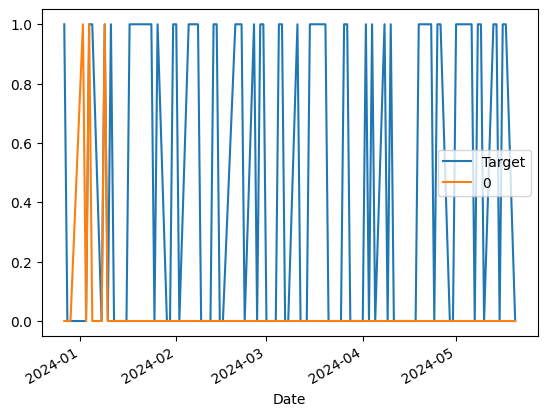

In [19]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [20]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [21]:
# Each year has ~250 trading days, we are using 10 years worth of data
def backtest(data, model, predictors, start=2500, step=250):
    all_preddictions = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        predictions = predict(train, test, predictors, model)
        all_preddictions.append(predictions)
    return pd.concat(all_preddictions)

In [22]:
predictions = backtest(sp500, model, predictors)

In [23]:
predictions["Predictions"].value_counts()

Predictions
0    2397
1     103
Name: count, dtype: int64

In [24]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5339805825242718

In [25]:
predictions["Target"].value_counts() / predictions.shape

Target
1      0.54
0    575.00
Name: count, dtype: float64

In [26]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors+= [ratio_column, trend_column]

In [27]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-14 00:00:00-04:00,5221.100098,5250.370117,5217.979980,5246.680176,4763580000,5308.149902,1,1.002413,1.0,1.005399,3.0,1.022066,31.0,1.127019,140.0,1.259524,531.0
2024-05-15 00:00:00-04:00,5263.259766,5311.759766,5263.259766,5308.149902,4360810000,5297.100098,0,1.005824,2.0,1.012503,4.0,1.032924,32.0,1.139098,140.0,1.273572,531.0
2024-05-16 00:00:00-04:00,5310.069824,5325.490234,5296.189941,5297.100098,3817470000,5303.270020,1,0.998958,1.0,1.007205,3.0,1.029721,31.0,1.135656,139.0,1.270232,530.0


In [28]:
sp500 = sp500.dropna()

In [29]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-13 00:00:00-04:00,5233.080078,5237.259766,5211.160156,5221.419922,4255710000,5246.680176,1,0.999879,1.0,1.002825,3.0,1.017942,30.0,1.122690,139.0,1.254150,531.0
2024-05-14 00:00:00-04:00,5221.100098,5250.370117,5217.979980,5246.680176,4763580000,5308.149902,1,1.002413,1.0,1.005399,3.0,1.022066,31.0,1.127019,140.0,1.259524,531.0
2024-05-15 00:00:00-04:00,5263.259766,5311.759766,5263.259766,5308.149902,4360810000,5297.100098,0,1.005824,2.0,1.012503,4.0,1.032924,32.0,1.139098,140.0,1.273572,531.0


In [30]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [31]:
# Lets modify our predict function 
# We are using predict_proba function to get probablity if the stock
# is going up tomorrow or not
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors]) [:,1]
    # we want the model to be a bit more confident this time
    # By default its 50%, we set it to 65% which will reduce the 
    # number of # of trading days but it will increase the chance 
    # that it will go up
    preds[preds >= 0.6] = 1
    preds[preds < 0.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [32]:
def predict(train, test, predictors, model):
    # Ensure that the predictors exist in the train DataFrame
    missing_predictors_train = [col for col in predictors if col not in train.columns]
    if missing_predictors_train:
        print(f"Missing predictors in train data: {missing_predictors_train}")
        raise KeyError(f"Missing predictors in train data: {missing_predictors_train}")

    # Ensure that the predictors exist in the test DataFrame
    missing_predictors_test = [col for col in predictors if col not in test.columns]
    if missing_predictors_test:
        print(f"Missing predictors in test data: {missing_predictors_test}")
        raise KeyError(f"Missing predictors in test data: {missing_predictors_test}")

    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:, 1]

    # Adjust the prediction threshold
    preds[preds >= 0.6] = 1
    preds[preds < 0.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [33]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:i+step].copy()  # Create the test DataFrame for the current step
        
        if test.empty:
            continue  # Skip if test data is empty
        
        # Print the columns of train and test to debug
        print(f"Train columns: {train.columns}")
        print(f"Test columns: {test.columns}")

        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)


In [34]:
predictions = backtest(sp500, model, new_predictors)

Train columns: Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Tomorrow', 'Target',
       'Close_Ratio_2', 'Trend_2', 'Close_Ratio_5', 'Trend_5',
       'Close_Ratio_60', 'Trend_60', 'Close_Ratio_250', 'Trend_250',
       'Close_Ratio_1000', 'Trend_1000'],
      dtype='object')
Test columns: Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Tomorrow', 'Target',
       'Close_Ratio_2', 'Trend_2', 'Close_Ratio_5', 'Trend_5',
       'Close_Ratio_60', 'Trend_60', 'Close_Ratio_250', 'Trend_250',
       'Close_Ratio_1000', 'Trend_1000'],
      dtype='object')
Train columns: Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Tomorrow', 'Target',
       'Close_Ratio_2', 'Trend_2', 'Close_Ratio_5', 'Trend_5',
       'Close_Ratio_60', 'Trend_60', 'Close_Ratio_250', 'Trend_250',
       'Close_Ratio_1000', 'Trend_1000'],
      dtype='object')
Test columns: Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Tomorrow', 'Target',
       'Close_Ratio_2', 'Trend_2', 'Close_Ratio_5', 'Trend_5',
       

In [35]:
predictions["Predictions"].value_counts()

Predictions
0.0    4328
1.0     833
Name: count, dtype: int64

In [36]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5738295318127251